# (Week2) ⛰富士山下山問題
```aim```
+ 数式演算ライブラリのNumPyに慣れる
+ [勾配降下法](https://www.google.com/search?sxsrf=ALeKk02_HPFAK7r2UK_Rp9CwmRLjzh1S9Q%3A1610706015416&ei=X2wBYOH0GMPWhwP9l6bQDw&q=%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95&oq=%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95&gs_lcp=CgZwc3ktYWIQAzIECCMQJzIGCAAQBBAlMgYIABAEECUyBggAEAQQJTIGCAAQBBAlMgYIABAEECUyBggAEAQQJTIGCAAQBBAlUIMvWO02YO86aABwAHgAgAGWAYgBzgeSAQMwLjeYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=psy-ab&ved=0ahUKEwihoIu_253uAhVD62EKHf2LCfoQ4dUDCA0&uact=5)(=最急降下法)の仕組みを知る
> 勾配降下法とは、重みを少しずつ更新して勾配が最小になる点を探索するアルゴリズムです。ディープニューラルネットワークにおける損失関数、コスト関数、誤差関数を最小化することに利用されます。一般的な勾配降下法として、最急降下法、バッチ勾配降下法があります。他の勾配降下法と区別するために本記事では「バッチ勾配降下法」といいます。
>
> 引用：[【超入門】勾配降下法とは？ - LIONRIDGE AI](https://lionbridge.ai/ja/articles/gradient-descent/#:~:text=%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95%E3%81%A8%E3%81%AF%E3%80%81%E9%87%8D%E3%81%BF%E3%82%92%E5%B0%91%E3%81%97%E3%81%9A%E3%81%A4%E6%9B%B4%E6%96%B0,%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95%E3%81%8C%E3%81%82%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82)

```Cf.```
+ [numpy.set_printoptions — NumPy v1.16 Manual](https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html)
+ [numpy.loadtxt — NumPy v1.16 Manual](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)
+ [立体地図（日本の主な山岳）](https://cyberjapandata.gsi.go.jp/3d/mountain/mountain.html)

In [1]:
import numpy as np

In [2]:
np.set_printoptions(suppress=True) #指数表示の禁止設定（抑制=True）
fuji = np.loadtxt('mtfuji_data.csv', delimiter=',', skiprows=1)

In [3]:
#「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」
print(fuji[0:10])

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


In [ ]:
print(fuji[130:140])

---
## 【問題1】データの可視化

    Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

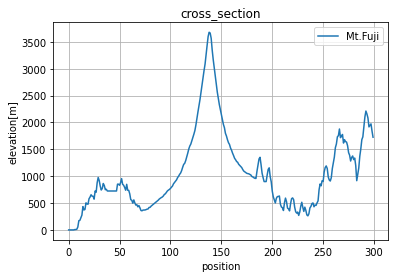

In [6]:
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.title("cross_section")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.legend()
plt.grid(True)
plt.show()

---
## 【問題2】ある地点の勾配を計算する関数を作成

    「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
    「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
    勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

<img src='https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png' width=15%>

In [7]:
# 勾配を計算する関数
def get_gradient(data):
    point = data[:,0]                            #現在地点 (300,)
    elevation = data[:,3]                        #標高 (300,)
    coordinate = np.vstack((point, elevation)).T #座標 (300,2)
    diff = coordinate[1:,] - coordinate[:-1,]    #差分 (299,2)
    slop =  diff[:,1] / diff[:,0]                #勾配 (299,)

    return slop

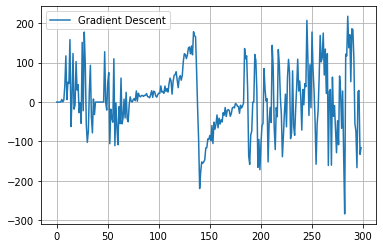

In [8]:
point = fuji[:,0]
grad = get_gradient(fuji)
plt.plot(point[:-1], grad, label='Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

---
## 【問題3】移動先の地点を計算する関数を作成

    今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
    数式で表すと 「移動先の地点 = 今いる地点 - α × 今いる地点の勾配」 となります。
    「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。 
    
    αは0より大きい任意の値をとるハイパーパラメータです。
    機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。
    
    《実装上の注意》
     上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。
     そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。
     例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。


    移動先の地点 = 今いる地点 - α × 今いる地点の勾配
    
    α = 0.2 ・・・学習率(ハイパーパラメーター)

>機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

```Cf.```
+ [Python tutorial エラーと例外](https://docs.python.org/ja/3/tutorial/errors.html)
+ [input() 関数](https://www.python.jp/train/string/input.html)

In [9]:
alpha = 0.2
grad = get_gradient(fuji) #(299, )
point = int(input('今いる地点の番号を入力:'))

今いる地点の番号を入力: 136


In [10]:
# 移動先地点を計算する関数
def get_destination(alpha, point, grad):
    destination = round(point - (alpha*grad[point]))
    return destination

In [11]:
destination_point = get_destination(alpha, point, grad)
print('移動先の地点は：{}'.format(destination_point))

移動先の地点は：103


---
## 【問題4】山を下る関数を作成

    山を下る関数を作成してください。
    最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。
    最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。
    
    《実装上の注意》
     問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。
     移動量が減ってきたということなので、その時点で山を下りきったと判断してください。
     実際の勾配降下法ではこのようなことは起きません。

In [12]:
alpha = 0.2
grad = get_gradient(fuji)
start_point = 136
iteration = 15

#山を下る関数
def descent(alpha, grad, start_point, iteration):
    next_point = get_destination(alpha, start_point, grad)
    
    gradient_log = [start_point]
    count = 0
    
    for i in range(iteration):
        if next_point == gradient_log[-1]: #重複回避
            break
        else:
            count += 1
            gradient_log.append(next_point)
            #print('{0}回：{1} → {2}'.format(count, start_point, next_point))

            #更新
            start_point = next_point
            next_point = get_destination(alpha, start_point, grad)
        
    return count, gradient_log 

In [13]:
count, log = descent(alpha, grad, start_point, iteration)
print(count, log)

9 [136, 103, 98, 95, 89, 86, 83, 80, 76, 74]


---
## 【問題5】下山過程の可視化

    問題4における下山過程をMatplotlibを使いグラフで可視化してください。
    
    《可視化例》
     - 断面図の中に移動した地点を点で表示する
     - 繰り返し毎の標高や勾配を折れ線グラフにする

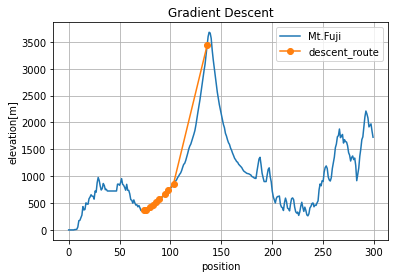

In [14]:
elevation = fuji[:,3] 
plt.plot(fuji[:,0], elevation, label='Mt.Fuji')
plt.plot(log, elevation[log], marker='o', label='descent_route')
plt.title("Gradient Descent")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.legend()
plt.grid(True)
plt.show()

---
## 【問題6】初期値の変更

    問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。
    そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。
    機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

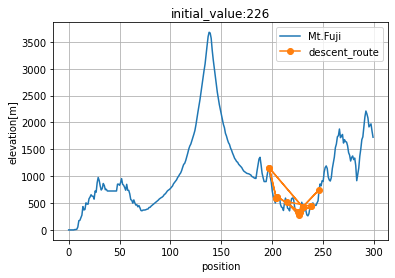

In [15]:
# 初期値２２６の場合
data = fuji               #データセット
start_point = 226         #初期値
alpha = 0.2               #学習率
grad = get_gradient(data) #勾配
iteration = 15            #学習回数

#実行
_, log = descent(alpha, grad, start_point, iteration)

#描画
elevation = data[:,3] 
plt.plot(data[:,0], elevation, label='Mt.Fuji')
plt.plot(log, elevation[log], marker='o', label='descent_route')
plt.title("initial_value:"+str(start_point))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.legend()
plt.grid(True)
plt.show()

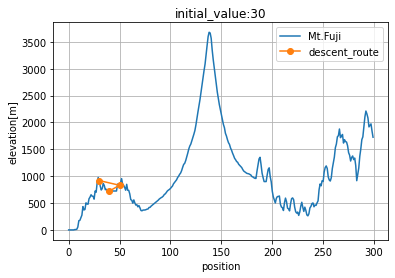

In [16]:
# 初期値30の場合
data = fuji               #データセット
start_point = 30          #初期値
alpha = 0.2               #学習率
grad = get_gradient(data) #勾配
iteration = 15            #学習回数

#実行
_, log = descent(alpha, grad, start_point, iteration)

#描画
elevation = data[:,3] 
plt.plot(data[:,0], elevation, label='Mt.Fuji')
plt.plot(log, elevation[log], marker='o', label='descent_route')
plt.title("initial_value:"+str(start_point))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.legend()
plt.grid(True)
plt.show()

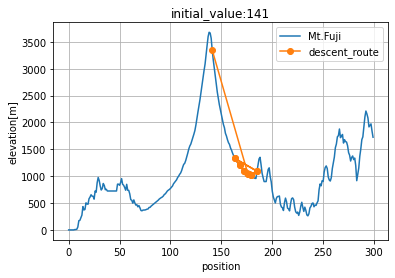

In [17]:
# 初期値141の場合
data = fuji               #データセット
start_point = 141         #初期値
alpha = 0.2               #学習率
grad = get_gradient(data) #勾配
iteration = 15            #学習回数

#実行
_, log = descent(alpha, grad, start_point, iteration)

#描画
elevation = data[:,3] 
plt.plot(data[:,0], elevation, label='Mt.Fuji')
plt.plot(log, elevation[log], marker='o', label='descent_route')
plt.title("initial_value:"+str(start_point))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.legend()
plt.grid(True)
plt.show()

---

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

    ハイパーパラメータ α　を変化させるとどのような下山過程となるか、問題5のように可視化してください。
    そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

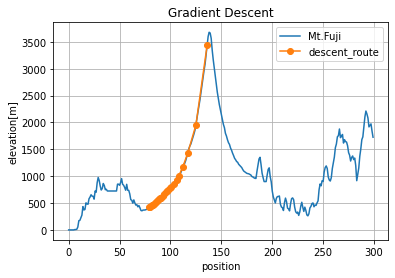

学習率：0.06666666666666667
回数：26
履歴:[136, 125, 117, 112, 108, 106, 103, 101, 100, 98, 97, 96, 94, 93, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79]


In [18]:
# 学習率 1/15 の場合
data = fuji               #データセット
start_point = 136         #初期値
alpha = 1/15              #学習率
grad = get_gradient(data) #勾配
iteration = 100           #学習回数

#実行
count, log = descent(alpha, grad, start_point, iteration)

#描画
elevation = data[:,3] 
plt.plot(data[:,0], elevation, label='Mt.Fuji')
plt.plot(log, elevation[log], marker='o', label='descent_route')
plt.title("Gradient Descent")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.legend()
plt.grid(True)
plt.show()

print('学習率：{0}\n回数：{1}\n履歴:{2}'.format(alpha, count, log))

---
## (番外)勾配降下法について

```Cf.```
+ [勾配降下法と誤差逆伝播法を簡単に説明！ - Qiita](https://qiita.com/kakiuchis/items/dbe81c31a50bc19038df)
+ [【超入門】勾配降下法とは？ - LIONRIDGE AI](https://lionbridge.ai/ja/articles/gradient-descent/#:~:text=%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95%E3%81%A8%E3%81%AF%E3%80%81%E9%87%8D%E3%81%BF%E3%82%92%E5%B0%91%E3%81%97%E3%81%9A%E3%81%A4%E6%9B%B4%E6%96%B0,%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95%E3%81%8C%E3%81%82%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82)

<img src='https://watlab-blog.com/wp-content/uploads/2020/02/steepest-direction.png' width=35%>

> 引用：[Pythonで1変数と2変数関数の勾配降下法を実装してみた](https://watlab-blog.com/2020/02/29/gradient-descent/)